In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import time
import os
import warnings
warnings.filterwarnings('ignore')


In [3]:

# load data set

x_load = np.load('X.npy')
y_load = np.load('Y.npy')
img_size = 64


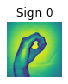

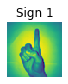

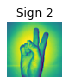

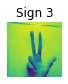

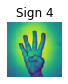

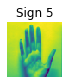

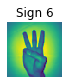

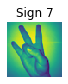

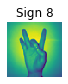

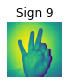

In [4]:

# one sample from each digits
image_index_list = [260,900,1800,1600,1400,2061,700,500,1111,100]
klas=pd.DataFrame([])
for each in range(10):
    plt.figure(figsize=(1,1))
    plt.imshow(x_load[image_index_list[each]].reshape(64,64))
    klas[each]= y_load[image_index_list[each]] 
    plt.axis('off')
    title = "Sign " + str(each) 
    plt.title(title)
plt.show()

In [5]:
y_lab=pd.DataFrame(y_load)
y_lab['lab']=1
y_lab['lab'][y_lab[1]==1.0 ]=4
y_lab['lab'][y_lab[2]==1.0 ]=8
y_lab['lab'][y_lab[3]==1.0 ]=7
y_lab['lab'][y_lab[4]==1.0 ]=6
y_lab['lab'][y_lab[5]==1.0 ]=9
y_lab['lab'][y_lab[6]==1.0 ]=3
y_lab['lab'][y_lab[7]==1.0 ]=2
y_lab['lab'][y_lab[8]==1.0 ]=5
y_lab['lab'][y_lab[9]==1.0 ]=0

In [6]:
y_lab['lab'].describe()

count    2062.000000
mean        4.506305
std         2.875335
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: lab, dtype: float64

In [7]:
X = x_load.reshape((len(x_load), -1)) 
print(X.shape)

train = X
test = X[image_index_list]
n_pixels = X.shape[1]

# Upper half of the faces
X_train = train[:, :]
X_test = test[:, :]

# Lower half of the faces
y_train = train[:,:]
y_test = test[:, :]
print('train',X_train.shape,y_train.shape)
print('test',X_test.shape,y_test.shape)

(2062, 4096)
train (2062, 4096) (2062, 4096)
test (10, 4096) (10, 4096)


In [8]:
def Klasseer(Mtrain,Mtest,Mlabel,klas,rank,start):
    #data preparation
    #print(Mtotal)
    #Mtotal=Mtotal.fillna(-1)
    #print(Mtotal)
    #Mtrain=Mtotal[Mtotal[labelveld]!=-1]
    #Mtest=Mtotal[Mtotal[labelveld]==-1]
    #Mtest=Mtest.drop(labelveld,axis=1)
    Mlabel=pd.DataFrame( Mlabel,columns=['lab'] )  #[:len(Mtrain)]
    #Mlabel=Mlabel.fillna(-1)  
    labelveld='lab'
    print('shapes train',Mtrain.shape,labelveld,Mlabel.shape,'test',Mtest.shape)

    
    #totalA=Mtrain.append(Mtest)
    totalA=np.concatenate((Mtrain,Mtest), axis=0)
    predictionA=pd.DataFrame(Mlabel,columns=[labelveld])    
    #totalA=totalA.drop(labelveld,axis=1)
    #print(totalA.shape,predictionA.shape)
    #print(prediction)
    #faze 1
    # dimmension reduction
    from scipy.spatial.distance import cosine
    from sklearn.metrics.pairwise import cosine_similarity
    from sklearn.decomposition import TruncatedSVD
    from sklearn.preprocessing import Normalizer
    from sklearn.pipeline import make_pipeline
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, log_loss
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC, LinearSVC, NuSVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
    from sklearn.linear_model import OrthogonalMatchingPursuit,RANSACRegressor,LogisticRegression,ElasticNetCV,HuberRegressor, Ridge, Lasso,LassoCV,Lars,BayesianRidge,SGDClassifier,LogisticRegressionCV,RidgeClassifier,Perceptron

    import seaborn as sns
    import matplotlib.pyplot as plt
    
    
    for ira in range(rank-start,rank+1):
        print('****20% sample test==',ira)
        #Ulsa = lsa.fit_transform(Mtrain.values/255)  #train version
        #print(total)
        if ira!=0:
            if ira<len(totalA.T):
                print("lsa dimmension reduction")                
                svd = TruncatedSVD(ira)
                normalizer = Normalizer(copy=False)
                lsa = make_pipeline(svd, normalizer)
                UlsA = lsa.fit_transform(totalA) #total version
                explained_variance = svd.explained_variance_ratio_.sum()
                print("Explained variance of the SVD step knowledge transfer: {}%".format(
                    int(explained_variance * 100)))            
            else:
                print("no reduction")
                UlsA=totalA
        else:
            print("3D-SVD dimmension reduction")
            u,s,vh=np.linalg.svd(totalA)
            print(u.shape, s.shape, vh.shape)
            UlsA=np.reshape(u, (len(totalA),len(totalA)))            
        #    UlsA = totalA
        #    print("no LSA reduction")
        print('ulsa',UlsA.shape)
        #print(UlsA)


        #faze2
        #training model

        #sample
        samlen=int(len(Mlabel)/5)
        print(samlen)
        X_train, X_test, y_train, y_test = train_test_split(UlsA[:samlen], Mlabel[:samlen],stratify=Mlabel[:samlen], test_size=0.25)
        print("test on 20% sample")
        
        if klas=='Logi':
            classifiers = [
    #    SVC(kernel="rbf", C=0.025, probability=True),  20%
    #    NuSVC(probability=True),
                LogisticRegression(),
                 ]
        if klas=='Quad':
            classifiers = [
                QuadraticDiscriminantAnalysis(),
                 ]           
        if klas=='Rand':
            classifiers = [
                RandomForestClassifier(84),
                 ]               
        if klas=='Extr':
            classifiers = [
                ExtraTreesClassifier(verbose=1,n_jobs=3),
                 ]             
        if klas=='Adab':
            classifiers = [
                AdaBoostClassifier(),
                 ]            
        if klas=='Deci':
            classifiers = [
                DecisionTreeClassifier(),
                 ]
        if klas=='Grad':
            classifiers = [
                GradientBoostingClassifier(),
                 ]            
        if klas=='KNN':
            classifiers = [
                KNeighborsClassifier(n_jobs=4),  
                 ]            
        if klas=='Line':
            classifiers = [
                LinearDiscriminantAnalysis(), 
                 ]  
        if klas=='Gaus':
            classifiers = [
                GaussianNB(),
                 ] 
        if klas=='Perc':
            classifiers = [
                Perceptron(),
                 ]      
        if klas=='Elas':
            classifiers = [
                ElasticNetCV(random_state=0),
                 ]                 
    # Logging for Visual Comparison
        log_cols=["Classifier", "Accuracy", "Log Loss"]
        log = pd.DataFrame(columns=log_cols)
    
        for clf in classifiers:
            clf.fit(X_train,y_train)
            name = clf.__class__.__name__
        
            print("="*30)
            print(name)
            
            #print('****Results****')
            train_predictions = clf.predict(X_test)
            acc = accuracy_score(y_test, train_predictions)
            print("Accuracy: {:.4%}".format(acc))
        
            train_predictions = clf.predict_proba(X_test)
            ll = log_loss(y_test, train_predictions)
            print("Log Loss: {}".format(ll))
            
            log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
            log = log.append(log_entry)
    
        print("="*30)

    print('*** train complete set==',UlsA[:len(Mlabel)].shape)
     
    clf.fit(UlsA[:len(Mlabel)],Mlabel)
    #on complete trainset

    #pr2=pd.DataFrame(clf.predict_proba(Ulsa),index=list(range(0,len(Ulsa),1)))

    predictionA=pd.DataFrame(clf.predict(UlsA),columns=['pred'],index=range(0,len(UlsA)))
    predictionA[labelveld]=Mlabel 
    print('predict',predictionA.shape)
    predictionA.fillna(-1)
    predictionA['diff']=0
    predictionA['next']=Mlabel
    #abs(prediction[labelveld]-prediction['pred
    collist=sorted( Mlabel[labelveld].unique() )

    print(collist)
    if klas=='Logi':
        predictionA[collist] = pd.DataFrame(clf.predict_log_proba(UlsA))
    if klas!='Logi':
        print(UlsA.shape)
        temp=pd.DataFrame(clf.predict_proba(UlsA))
        print(temp.shape)
        predictionA[collist]=temp
    
    from sklearn.metrics import classification_report, confusion_matrix
    true_labels=predictionA[labelveld][:len(Mtrain)] #.values.astype('float32')
    predicted_labels = predictionA['pred'][:len(Mtrain)] #.values.astype('float32')

    cm = confusion_matrix(true_labels, predicted_labels,labels=collist)
    print(classification_report(true_labels, predicted_labels))
    print("Confusion matrix")
    print(cm)
    
    corr=predictionA.drop(['pred','diff'],axis=1).corr()
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(abs(corr), mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)
    predictionA=predictionA.fillna('0')
    #print('Prediction',prediction.head())
    pred2=predictionA.drop(['pred',labelveld,'diff','next'],axis=1)
    
    print(predictionA.shape)


    return predictionA #['next']

x_load.shape

(2062, 64, 64)

shapes train (2062, 4096) lab (2062, 1) test (2062, 4096)
****20% sample test== 30
lsa dimmension reduction
Explained variance of the SVD step knowledge transfer: 64%
ulsa (4124, 30)
412
test on 20% sample
LogisticRegression
Accuracy: 94.1748%
Log Loss: 0.5848221563761784
*** train complete set== (2062, 30)
predict (4124, 2)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
              precision    recall  f1-score   support

         0.0       0.73      0.77      0.75       207
         1.0       0.59      0.82      0.69       204
         2.0       0.77      0.72      0.75       206
         3.0       0.74      0.22      0.34       207
         4.0       0.62      0.89      0.73       205
         5.0       0.58      0.52      0.55       206
         6.0       0.66      0.77      0.71       206
         7.0       0.62      0.58      0.60       207
         8.0       0.53      0.51      0.52       206
         9.0       0.66      0.62      0.64       208

    accuracy                           0.64   

(4124, 14)
shapes train (2062, 4096) lab (2062, 1) test (2062, 4096)
****20% sample test== 150
lsa dimmension reduction
Explained variance of the SVD step knowledge transfer: 88%
ulsa (4124, 150)
412
test on 20% sample
AdaBoostClassifier
Accuracy: 86.4078%
Log Loss: 0.5497579632263264
*** train complete set== (2062, 150)
predict (4124, 2)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
(4124, 150)
(4124, 10)
              precision    recall  f1-score   support

         0.0       0.59      0.51      0.55       207
         1.0       0.60      0.59      0.59       204
         2.0       0.61      0.31      0.41       206
         3.0       0.34      0.50      0.40       207
         4.0       0.78      0.63      0.70       205
         5.0       0.50      0.55      0.53       206
         6.0       0.65      0.55      0.59       206
         7.0       0.46      0.50      0.48       207
         8.0       0.45      0.54      0.49       206
         9.0       0.54      0.60      0.57       208

    accur

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


Accuracy: 93.2039%
Log Loss: 0.4826463388148296
*** train complete set== (2062, 10)


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


predict (4124, 2)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
(4124, 10)
(4124, 10)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       207
         1.0       1.00      1.00      1.00       204
         2.0       1.00      1.00      1.00       206
         3.0       1.00      1.00      1.00       207
         4.0       1.00      1.00      1.00       205
         5.0       1.00      1.00      1.00       206
         6.0       1.00      1.00      1.00       206
         7.0       1.00      1.00      1.00       207
         8.0       1.00      1.00      1.00       206
         9.0       1.00      1.00      1.00       208

    accuracy                           1.00      2062
   macro avg       1.00      1.00      1.00      2062
weighted avg       1.00      1.00      1.00      2062

Confusion matrix
[[207   0   0   0   0   0   0   0   0   0]
 [  0 204   0   0   0   0   0   0   0   0]
 [  0   0 206   0   0   0   0   0   0   0]
 [  0   0   0 207   0   

,pred,lab,diff,next,0,1,2,3,4,5,6,7,8,9
0,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


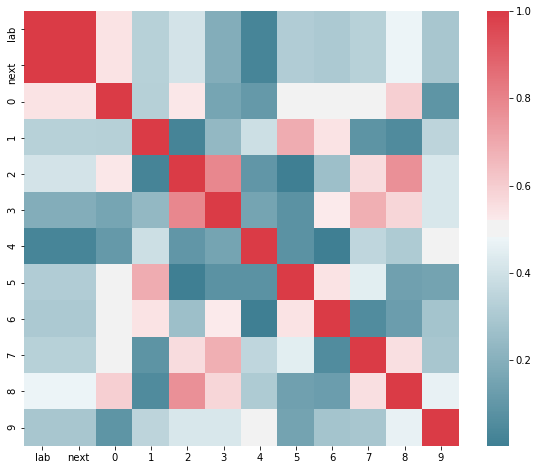

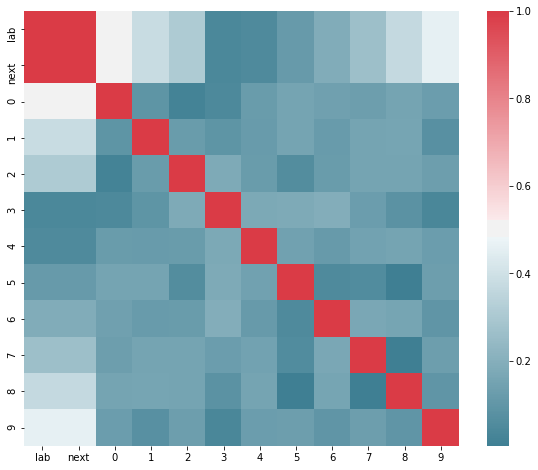

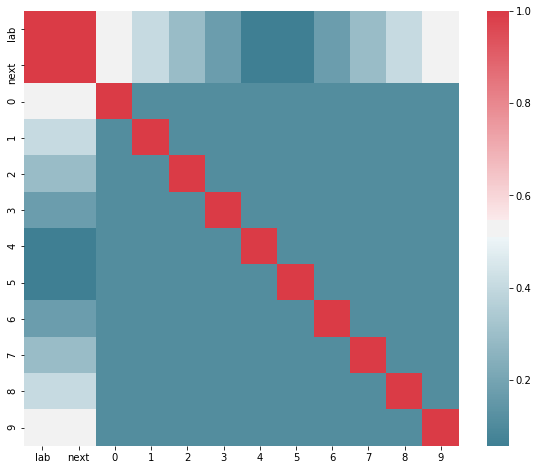

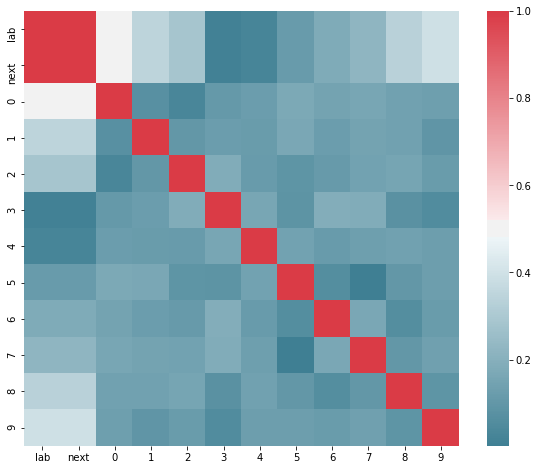

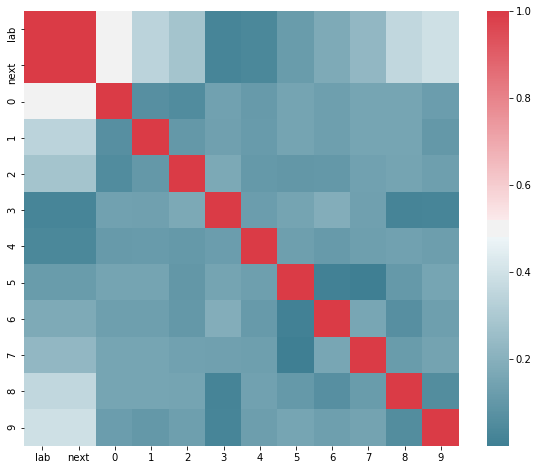

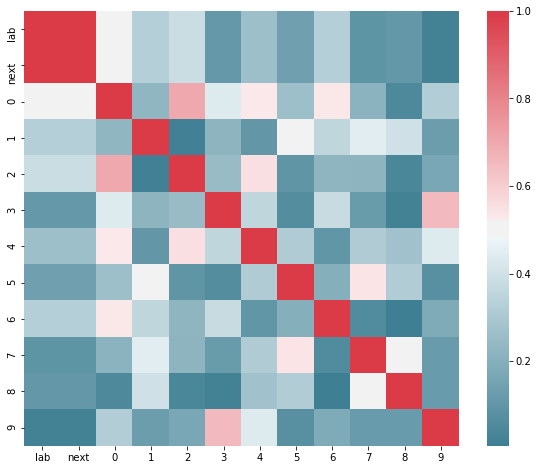

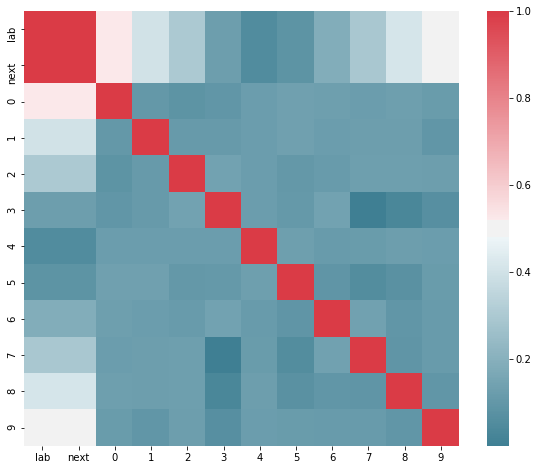

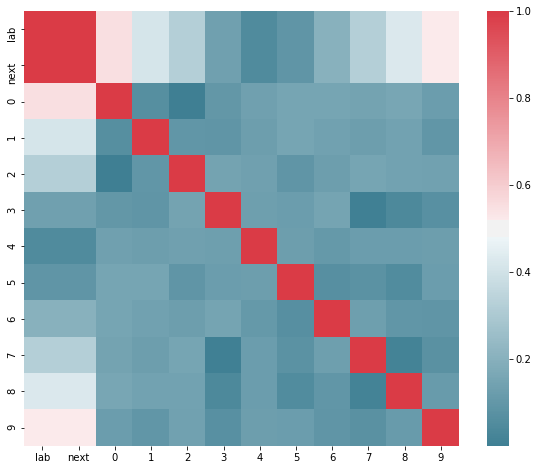

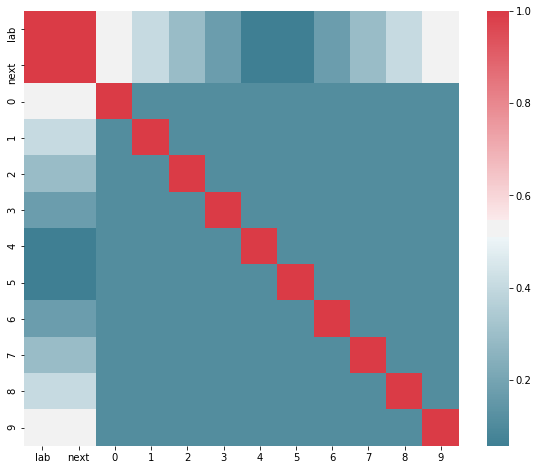

In [9]:
Xtrain=pd.DataFrame(x_load.reshape(2062,64*64)).fillna(0)
#print(Xtrain)
ylabel=pd.DataFrame(y_lab['lab'].values,columns=['lab']).fillna(0)
Klasseer(Xtrain,Xtrain,ylabel,'Logi',30,0) 
Klasseer(Xtrain,Xtrain,ylabel,'KNN',30,0) 
Klasseer(Xtrain,Xtrain,ylabel,'Quad',200,0) 
Klasseer(Xtrain,Xtrain,ylabel,'Gaus',30,0) 
Klasseer(Xtrain,Xtrain,ylabel,'Line',30,0) 
Klasseer(Xtrain,Xtrain,ylabel,'Adab',150,0) 
Klasseer(Xtrain,Xtrain,ylabel,'Grad',30,0) 
Klasseer(Xtrain,Xtrain,ylabel,'Rand',10,0) 
Klasseer(Xtrain,Xtrain,ylabel,'Extr',10,0) 

shapes train (2062, 4096) lab (2062, 1) test (2062, 4096)
****20% sample test== 0
3D-SVD dimmension reduction
(4124, 4124) (4096,) (4096, 4096)
ulsa (4124, 4124)
412
test on 20% sample
ExtraTreesClassifier


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


Accuracy: 85.4369%
Log Loss: 0.7167067045498208
*** train complete set== (2062, 4124)


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


predict (4124, 2)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
(4124, 4124)
(4124, 10)


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       207
         1.0       1.00      1.00      1.00       204
         2.0       1.00      1.00      1.00       206
         3.0       1.00      1.00      1.00       207
         4.0       1.00      1.00      1.00       205
         5.0       1.00      1.00      1.00       206
         6.0       1.00      1.00      1.00       206
         7.0       1.00      1.00      1.00       207
         8.0       1.00      1.00      1.00       206
         9.0       1.00      1.00      1.00       208

    accuracy                           1.00      2062
   macro avg       1.00      1.00      1.00      2062
weighted avg       1.00      1.00      1.00      2062

Confusion matrix
[[207   0   0   0   0   0   0   0   0   0]
 [  0 204   0   0   0   0   0   0   0   0]
 [  0   0 206   0   0   0   0   0   0   0]
 [  0   0   0 207   0   0   0   0   0   0]
 [  0   0   0   0 205   0   0   0   0   0]
 [  0   0

,pred,lab,diff,next,0,1,2,3,4,5,6,7,8,9
0,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


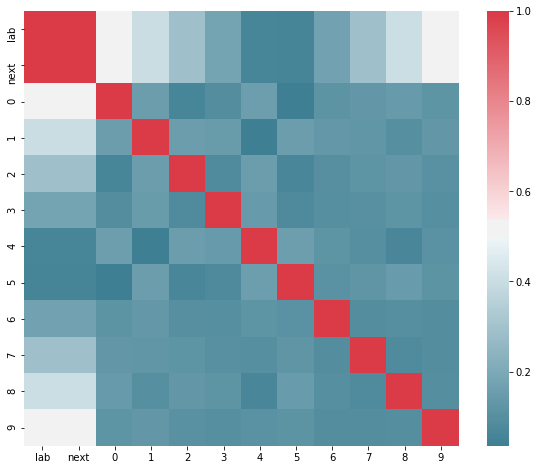

In [10]:
Klasseer(Xtrain,Xtrain,ylabel,'Extr',0,0)